In [1]:
import numpy as np # gives array
import pandas as pd  # helps to clean data
import re # to make pattern
from nltk.corpus import stopwords # to remove these kinda stopwaords "the for in is with.."
import nltk
nltk.data.path.append("C:/Users/ayesh/nltk_data")
from nltk.stem.porter import PorterStemmer # to convert words in its base form "tested testing == test"
from sklearn.feature_extraction.text import TfidfVectorizer # convert text into vector "tested =[0,0,1]"
from sklearn.model_selection import train_test_split # to split data into train and test sections
from sklearn.linear_model import LogisticRegression # for classification
from sklearn.metrics import accuracy_score # to get the accuracy of the model

In [2]:
news_df = pd.read_csv('train.csv')

In [3]:
news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
news_df.shape

(20800, 5)

# Preprocessing

In [5]:
news_df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
news_df = news_df.fillna(' ')

In [59]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20800 non-null  int64 
 1   title        20800 non-null  object
 2   author       20800 non-null  object
 3   text         20800 non-null  object
 4   label        20800 non-null  int64 
 5   content      20800 non-null  object
 6   text_length  20800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [8]:
news_df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
news_df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
# Combine title and text
news_df['content'] = news_df['title'] + ' ' + news_df['text']

In [11]:
news_df['content']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Why the Trut...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive   David Swanson is a...
Name: content, Length: 20800, dtype: object

# Stemming

In [12]:
ps = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]'," ", content) # remove the commas, semicolons etc
    stemmed_content = stemmed_content.lower() # convert it into lowercase
    stemmed_content = stemmed_content.split() # convert string to list

    # Removing the stop words and converting it into base form
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content) # converting the list of words back to string
    return stemmed_content

In [13]:
news_df['content'] = news_df['content'].apply(stemming)

In [14]:
news_df['content']

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2        truth might get fire truth might get fire octo...
3        civilian kill singl us airstrik identifi video...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci rapp...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan nato ...
20799    keep f aliv david swanson author activist jour...
Name: content, Length: 20800, dtype: object

# EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

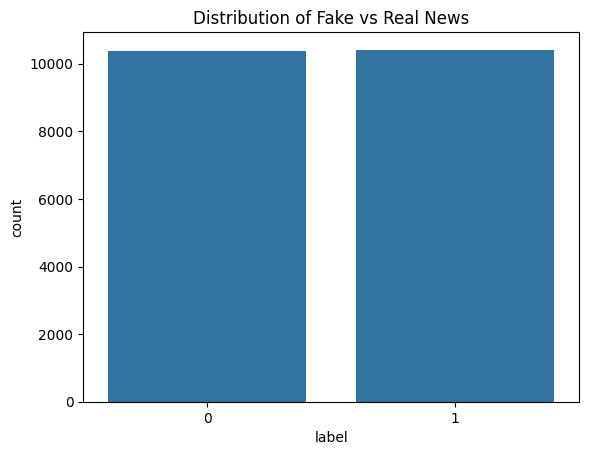

In [16]:
# 1. Check label distribution
sns.countplot(x='label', data=news_df)
plt.title("Distribution of Fake vs Real News")
plt.show()

In [17]:
# 2. Text length analysis
news_df['text_length'] = news_df['text'].apply(len)

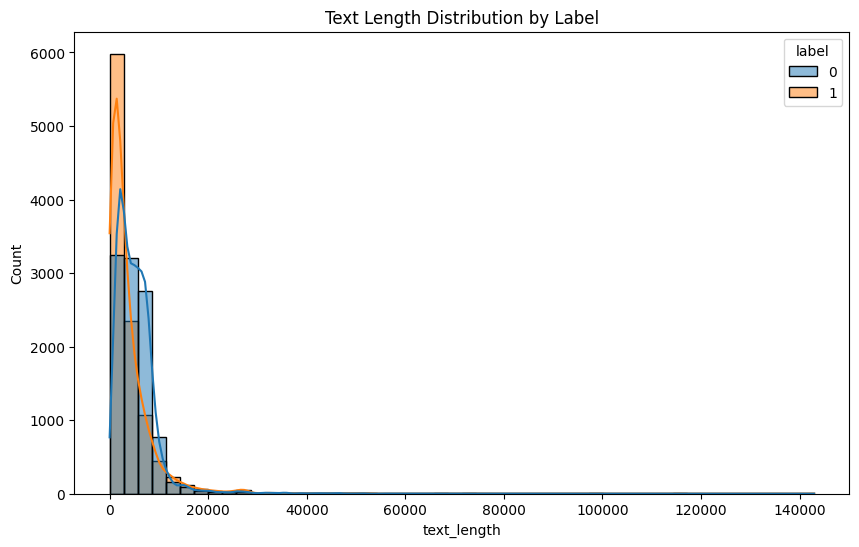

In [18]:
# 3. Distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=news_df, x='text_length', bins=50, kde=True, hue='label')
plt.title("Text Length Distribution by Label")
plt.show()

In [19]:
# 4. Word cloud 
from wordcloud import WordCloud

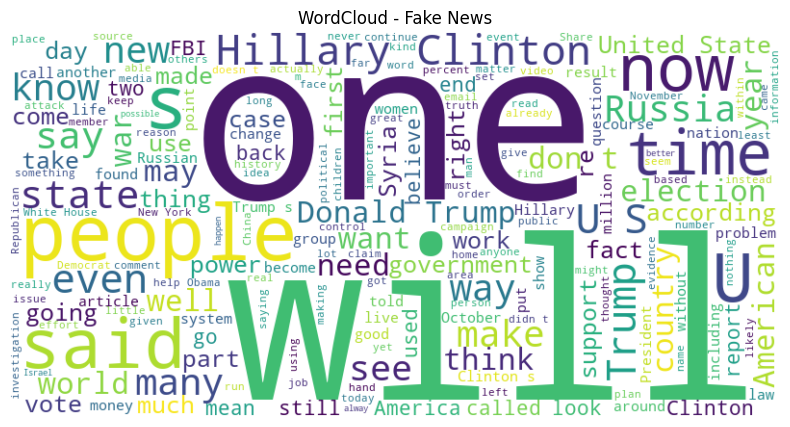

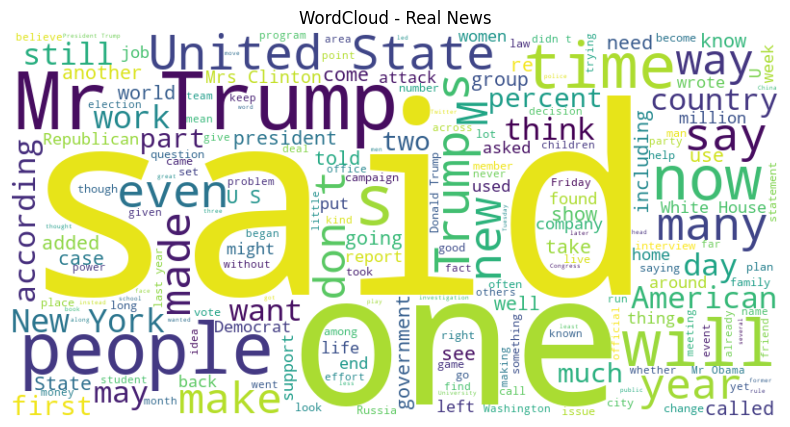

In [20]:
# WordCloud for Fake News
fake_text = " ".join(news_df[news_df['label'] == 1]['text'].dropna())
real_text = " ".join(news_df[news_df['label'] == 0]['text'].dropna())

wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Fake News")
plt.show()

wc = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Real News")
plt.show()

# Separating Features and Label

In [21]:
X= news_df['content'].values
y= news_df['label'].values

# Converting Textual Feature into Vecotor

In [22]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [23]:
print(X)

  (0, 323)	0.044179022507208135
  (0, 518)	0.02332405077764721
  (0, 632)	0.039316203504174516
  (0, 869)	0.015976541921521512
  (0, 918)	0.016642095819834255
  (0, 1292)	0.021398757998419504
  (0, 1602)	0.018255643322868005
  (0, 1877)	0.11720929349150563
  (0, 3008)	0.04733009098564867
  (0, 3028)	0.019311970062028613
  (0, 3363)	0.011979048895968012
  (0, 3725)	0.03134889384323141
  (0, 4135)	0.016933166314925904
  (0, 4237)	0.019716700911550464
  (0, 4282)	0.02693212295173725
  (0, 4563)	0.017964895769890684
  (0, 4746)	0.026333626062969923
  (0, 4796)	0.042317596939954696
  (0, 4813)	0.01462055924601113
  (0, 6387)	0.018502204351742796
  (0, 6930)	0.0209635900182605
  (0, 8509)	0.021972639591348223
  (0, 9022)	0.014453700828335692
  (0, 10780)	0.048308058449603494
  (0, 12171)	0.02820114316501808
  :	:
  (20799, 106136)	0.03677728368716433
  (20799, 106269)	0.04946563012472331
  (20799, 106585)	0.018756039260858177
  (20799, 106619)	0.04336474130063181
  (20799, 106943)	0.01749575

# Train/Test split

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)

In [25]:
X_train.shape

(16640, 110766)

In [26]:
X_test.shape

(4160, 110766)

In [27]:
(y_test == 0).sum()

2077

In [28]:
(y_test == 1).sum()

2083

# Logistic Regression

In [29]:
from sklearn.metrics import classification_report

In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
train_y_pred = lr_model.predict(X_train)

In [32]:
print("Training accuracy :" , accuracy_score(train_y_pred, y_train))

Training accuracy : 0.9745192307692307


In [33]:
test_y_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy :" , accuracy_score(test_y_pred, y_test))

Logistic Regression Accuracy : 0.9512019230769231


In [34]:
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2077
           1       0.95      0.96      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [36]:
cm = confusion_matrix(y_test, test_y_pred)
print("Logistic Regression Confusion Matrix:")
print(cm)

Logistic Regression Confusion Matrix:
[[1961  116]
 [  87 1996]]


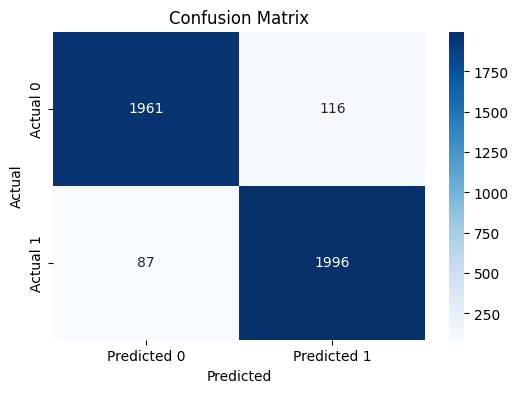

In [37]:
# 2. Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.9300480769230769


In [41]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2077
           1       0.95      0.90      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



In [42]:
cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:")
print(cm)

Random Forest Confusion Matrix:
[[1987   90]
 [ 201 1882]]


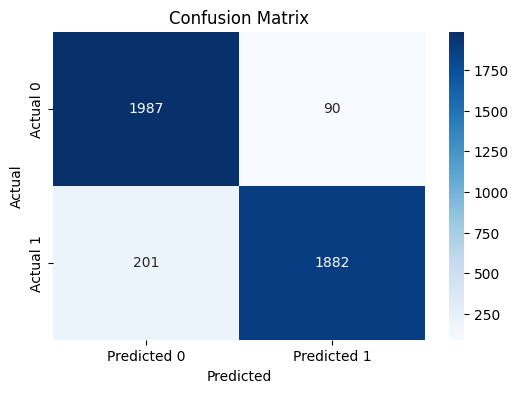

In [43]:
# 2. Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [44]:
from sklearn.svm import LinearSVC

In [45]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

LinearSVC()

In [46]:
svc_pred = svc_model.predict(X_test)
print("Linear SVC Accuracy:", accuracy_score(y_test, svc_pred))

Linear SVC Accuracy: 0.9665865384615384


In [47]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2077
           1       0.96      0.97      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [48]:
cm = confusion_matrix(y_test, svc_pred)
print("Linear SVC Confusion Matrix:")
print(cm)

Linear SVC Confusion Matrix:
[[2001   76]
 [  63 2020]]


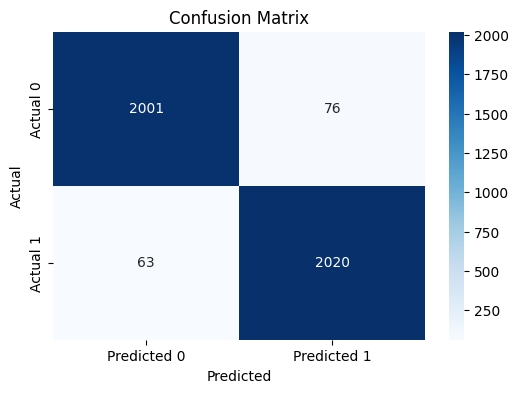

In [49]:
# 2. Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Ensemble model

In [50]:
from xgboost import XGBClassifier #A tree-based ensemble method known for high accuracy.

clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.10,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.8,  
    reg_alpha=0.1,
    reg_lambda=0.1,
    verbosity=0,
)

model = clf.fit(X_train, y_train)
pred = model.predict(X_test)


In [51]:
print("Accuracy of XGBoost:", accuracy_score(y_test, pred))

Accuracy of XGBoost: 0.973798076923077


In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2077
           1       0.97      0.98      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [53]:
cm = confusion_matrix(y_test, pred)
print("XGBoost Confusion Matrix:")
print(cm)

XGBoost Confusion Matrix:
[[2009   68]
 [  41 2042]]


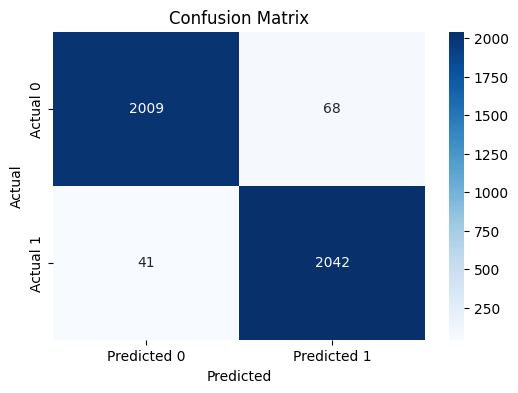

In [54]:
# 2. Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Prediction on Input

In [55]:
def show_article_prediction(model, test_index, X_test, y_test, news_df):
    """
    Display prediction results for a single article.
    
    Args:
        model: Trained classifier (e.g., LogisticRegression, SVC, XGBoost, etc.)
        test_index: Integer index of the test sample to inspect
        X_test: Transformed test feature set
        y_test: Corresponding test labels (NumPy array)
        news_df: Original DataFrame containing article data
    """
    # Predict
    input_data = X_test[test_index].reshape(1, -1)
    prediction = model.predict(input_data)

    # Actual label
    actual_label = y_test[test_index]

    # Try to find matching row in original DataFrame (approximate)
    # This assumes you used news_df['label'] directly during preprocessing
    possible_matches = news_df[news_df['label'] == actual_label]
    if test_index >= len(possible_matches):
        print("Could not find a matching article in the DataFrame.")
        return

    article_info = possible_matches.iloc[test_index]

    # Display results
    print("📰 Article Title:", article_info.get('title', 'N/A'))
    print("✍️ Author:", article_info.get('author', 'N/A'))
    print("✅ Actual Label:", "Real News" if actual_label == 0 else "Fake News")
    print("🤖 Predicted Label:", "Real News" if prediction[0] == 0 else "Fake News")



In [56]:
show_article_prediction(clf, 13, X_test, y_test, news_df)

📰 Article Title: Humiliated Hillary Tries To Hide What Camera Caught 15 Mins Before Rally
✍️ Author: Amanda Shea
✅ Actual Label: Fake News
🤖 Predicted Label: Fake News


In [57]:
from joblib import dump
dump(clf,'model.pkl')

['model.pkl']

In [58]:
dump(vector, 'vectorizer.pkl')

['vectorizer.pkl']